### New code for 80%



In [366]:

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.callbacks import ModelCheckpoint


In [382]:

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '../dataset/training_set/smo'
validation_data_dir = '../dataset/test_set/smo'
nb_train_samples = 2000
nb_validation_samples = 300
epochs = 10
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [383]:

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
#model.load_weights('../weights.best.hdf5')
filepath='../weights.best.hdf5'
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


In [384]:
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


In [385]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 4299 images belonging to 2 classes.


In [386]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')


Found 600 images belonging to 2 classes.


In [387]:

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    #steps_per_epoch=nb_train_samples, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    #validation_steps=nb_validation_samples,
    callbacks=callbacks_list)



Epoch 1/10
125/125 [==============================] - 11s 90ms/step - loss: 0.6587 - acc: 0.6145 - val_loss: 0.6121 - val_acc: 0.6867

Epoch 00001: val_acc improved from -inf to 0.68667, saving model to ../weights.best.hdf5
Epoch 2/10
125/125 [==============================] - 10s 78ms/step - loss: 0.6336 - acc: 0.6675 - val_loss: 0.6015 - val_acc: 0.7067

Epoch 00002: val_acc improved from 0.68667 to 0.70667, saving model to ../weights.best.hdf5
Epoch 3/10
125/125 [==============================] - 10s 79ms/step - loss: 0.6180 - acc: 0.6726 - val_loss: 0.5985 - val_acc: 0.6950

Epoch 00003: val_acc did not improve from 0.70667
Epoch 4/10
125/125 [==============================] - 10s 78ms/step - loss: 0.6108 - acc: 0.6805 - val_loss: 0.5990 - val_acc: 0.7033

Epoch 00004: val_acc did not improve from 0.70667
Epoch 5/10
125/125 [==============================] - 10s 80ms/step - loss: 0.6072 - acc: 0.6820 - val_loss: 0.6159 - val_acc: 0.6750

Epoch 00005: val_acc did not improve from 0.

In [388]:
model.save_weights('smorking.h5')


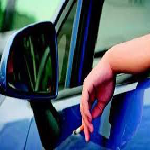

In [419]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../dataset/single_prediction/smo/s3.jpg', target_size= (150,150))
test_image

In [420]:
test_image = image.img_to_array(test_image)

#test_image

In [421]:
type(test_image)

numpy.ndarray

In [422]:
test_image.shape

(150, 150, 3)

In [423]:
test_image4 = test_image
test_image = np.expand_dims(test_image, axis = 0)

In [424]:
#a = np.array([[1,2,3],[4,5,6]])
#a.shape

np.expand_dims(a, axis = 0)

array([[[1, 2, 3],
        [4, 5, 6]]])

In [425]:
result = model.predict_classes(test_image)


In [426]:
result

array([[0]], dtype=int32)

In [427]:
result =  model.predict(test_image4)

ValueError: Error when checking input: expected conv2d_16_input to have 4 dimensions, but got array with shape (150, 150, 3)

In [428]:
result

array([[0]], dtype=int32)

In [410]:
import numpy as np
model.predict(np.expand_dims(test_image4, axis=0))

array([[0.]], dtype=float32)

In [314]:
 !pip install --upgrade keras

Requirement already up-to-date: keras in ./lib/python3.6/site-packages (2.2.2)


### New Code for 90%

In [349]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint


# path to the model weights files.
weights_path = 'vgg16_weights.h5'
#top_model_weights_path = 'fc_model.h5'
# dimensions of our images.
img_width, img_height = 150, 150


In [350]:
train_data_dir = 'dataset/training_set/smo'
validation_data_dir = 'dataset/test_set/smo'
nb_train_samples = 2000
nb_validation_samples = 300
epochs = 50
batch_size = 16

In [353]:
# build the VGG16 network
# dimensions of our images.

#model = applications.VGG16(weights='imagenet', include_top=False)
model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
print('Model loaded.')

Model loaded.


In [354]:
# build a classifier model to put on top of the convolutional model
top_model = Sequential()
top_model.add(Flatten(input_shape=model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))


In [355]:

# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:25]:
    layer.trainable = False

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 4299 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [ ]:
# fine-tune the model
model.fit_generator(
    train_generator,
    samples_per_epoch=nb_train_samples,
    epochs=epochs,
    validation_data=validation_generator,
    nb_val_samples=nb_validation_samples,
    

###  New Code 909090


In [659]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint


# path to the model weights files.
weights_path = '../vgg16_weights.h5'
top_model_weights_path = '../every.best.hdf5'
filepath='../every.best.hdf5'
# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = '../dataset/training_set/smo'
validation_data_dir = '../dataset/test_set/smo'

nb_train_samples = 2000
nb_validation_samples = 300
epochs = 30
batch_size = 16

# build the VGG16 network
#model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
print('base_model loaded.')

base_model loaded.


In [660]:
# build a classifier model to put on top of the convolutional model
#top_model.load_weights(weights_path)
top_model = Sequential()
top_model.add(Flatten(input_shape=base_model.output_shape[1:]))
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

# note that it is necessary to start with a fully-trained
# classifier, including the top classifier,
# in order to successfully do fine-tuning
#top_model.load_weights(weights_path)



# add the model on top of the convolutional base
# model.add(top_model)
model = Model(inputs=base_model.input, outputs=top_model(base_model.output))
#model.load_weights(weights_path)

In [661]:
# set the first 25 layers (up to the last conv block)
# to non-trainable (weights will not be updated)
for layer in model.layers[:15]:    #if using 25, it mean it does not train anything!
    layer.trainable = False

In [662]:

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [663]:
# prepare data augmentation configuration
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [664]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [665]:

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

Found 4299 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [666]:
# fine-tune the model
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True,
                            mode='max')
callbacks_list = [checkpoint]



train_history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples  // batch_size,  
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples  // batch_size,
    callbacks=callbacks_list)


Epoch 1/30
125/125 [==============================] - 13s 102ms/step - loss: 0.6894 - acc: 0.5805 - val_loss: 0.5637 - val_acc: 0.7250

Epoch 00001: val_acc improved from -inf to 0.72500, saving model to ../every.best.hdf5
Epoch 2/30
125/125 [==============================] - 10s 83ms/step - loss: 0.5441 - acc: 0.7260 - val_loss: 0.5078 - val_acc: 0.7533

Epoch 00002: val_acc improved from 0.72500 to 0.75333, saving model to ../every.best.hdf5
Epoch 3/30
125/125 [==============================] - 10s 84ms/step - loss: 0.5027 - acc: 0.7655 - val_loss: 0.4947 - val_acc: 0.7600

Epoch 00003: val_acc improved from 0.75333 to 0.76000, saving model to ../every.best.hdf5
Epoch 4/30
125/125 [==============================] - 10s 83ms/step - loss: 0.4702 - acc: 0.7823 - val_loss: 0.4760 - val_acc: 0.7750

Epoch 00004: val_acc improved from 0.76000 to 0.77500, saving model to ../every.best.hdf5
Epoch 5/30
125/125 [==============================] - 11s 85ms/step - loss: 0.4708 - acc: 0.7825 - val

In [608]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
model.save_weights(top_model_weights_path)
#model.save_weights('every.best.hdf5')

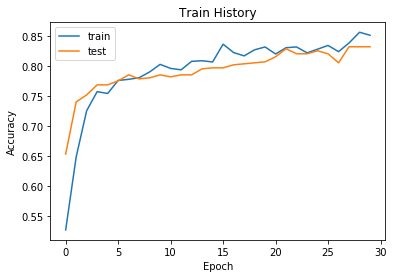

In [609]:
show_train_history('acc','val_acc')

In [610]:
# 顯示訓練成果(分數)
#scores = model.evaluate(train_generator, validation_generator)  

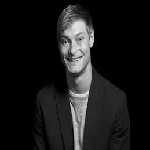

In [655]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('../dataset/single_prediction/smo/n2.jpg', target_size= (150,150))
test_image

In [656]:
test_image = image.img_to_array(test_image)

inputarray = test_image[np.newaxis,...] # dimension added to fit input size


In [657]:
result =  model.predict(inputarray)

In [658]:
print(result)
print("Predicted=%s", result)

[[5.178614e-14]]
Predicted=%s [[5.178614e-14]]


### other code

In [567]:
test_image2 = np.expand_dims(test_image, axis = 0)
a = np.array([[1,2,3],[4,5,6]])
a.shape
#

(2, 3)

In [568]:
np.expand_dims(a, axis = 0)

np.array(test_image2)

array([[[[242., 242., 242.],
         [236., 236., 236.],
         [229., 229., 229.],
         ...,
         [209., 209., 209.],
         [209., 209., 209.],
         [209., 209., 209.]],

        [[242., 242., 242.],
         [236., 236., 236.],
         [229., 229., 229.],
         ...,
         [210., 210., 210.],
         [209., 209., 209.],
         [209., 209., 209.]],

        [[242., 242., 242.],
         [236., 236., 236.],
         [229., 229., 229.],
         ...,
         [210., 210., 210.],
         [209., 209., 209.],
         [209., 209., 209.]],

        ...,

        [[244., 232., 220.],
         [223., 213., 201.],
         [221., 217., 205.],
         ...,
         [242., 240., 225.],
         [236., 236., 228.],
         [232., 232., 224.]],

        [[233., 234., 218.],
         [216., 217., 203.],
         [227., 220., 210.],
         ...,
         [235., 230., 211.],
         [238., 232., 220.],
         [238., 232., 220.]],

        [[233., 234., 218.],
       

In [538]:
test_image3 = np.array(test_image2)

In [539]:
result =  model.predict(test_image3)

In [540]:
print(result)
print("result=%s", result)


[[1.]]
result=%s [[1.]]


In [513]:
# Evaluate the model and save the results into a dictionary
#test_data = np.expand_dims(test_image, axis=0)
#metrics = model.evaluate(test_data, batch_size=40)
#print(metrics['accuracy'])
print(100 * result)
print("\n%s: %s" % (model.metrics_names[1], np.array_str(result*100)))
print("\n%s: %.2f%%" % (model.metrics_names[1], result[0]*100))


[[9.011003e-24]]

acc: [[9.011003e-24]]

acc: 0.00%


### other code 


In [485]:
import numpy as np
model.predict(np.expand_dims(test_image, axis=0))

array([[1.]], dtype=float32)

In [486]:
# Evaluate the model and save the results into a dictionary
#test_data = np.expand_dims(test_image, axis=0)
#metrics = model.evaluate(test_data, batch_size=40)
#print(metrics['accuracy'])
print(100 * predictions)
print("\n%s: %s" % (model.metrics_names[1], np.array_str(predictions*100)))
print("\n%s: %.2f%%" % (model.metrics_names[1], predictions[0]*100))


[[3.236911e-17]]

acc: [[3.236911e-17]]

acc: 0.00%


In [487]:
from sklearn.metrics import accuracy_score

predictions = model.predict(np.expand_dims(test_image, axis=0))
breed_predictions = [np.argmax(prediction) for prediction in predictions]
breed_true_labels = [np.argmax(true_label) for true_label in nb_validation_samples]
print('Test accuracy: %.4f%%' % (accuracy_score(breed_true_labels, breed_predictions) * 100))

TypeError: 'int' object is not iterable

In [ ]:
predictions = [float(round(x)) for x in probabilities]
accuracy = numpy.mean(predictions == Y)
print("Prediction Accuracy: %.2f%%" % (accuracy*100))